# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/2023-Sysoeva-TimeSeriesCourse/practice/05 Snippets')

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
!pip install matrixprofile

  Using cached matrixprofile-1.1.10.tar.gz (331 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
!pip install stumpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 2.8 MB/s eta 0:00:00


Импорт библиотек и модулей

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from modules.snippets import plot_snippets
import pandas as pd
from sklearn.metrics import accuracy_score
import plotly.express as px
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

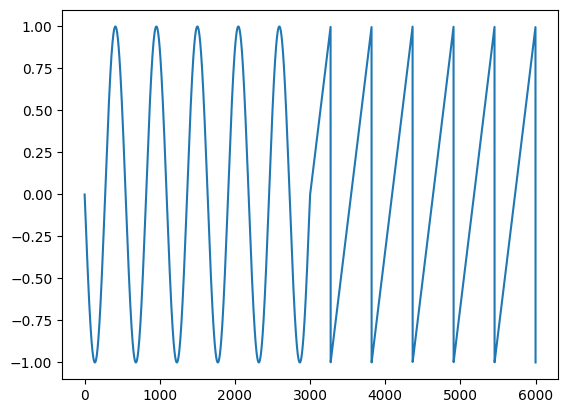

In [ ]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [ ]:
#Поиск сниппетов
snp = snippets(ts, 600, 2)

600


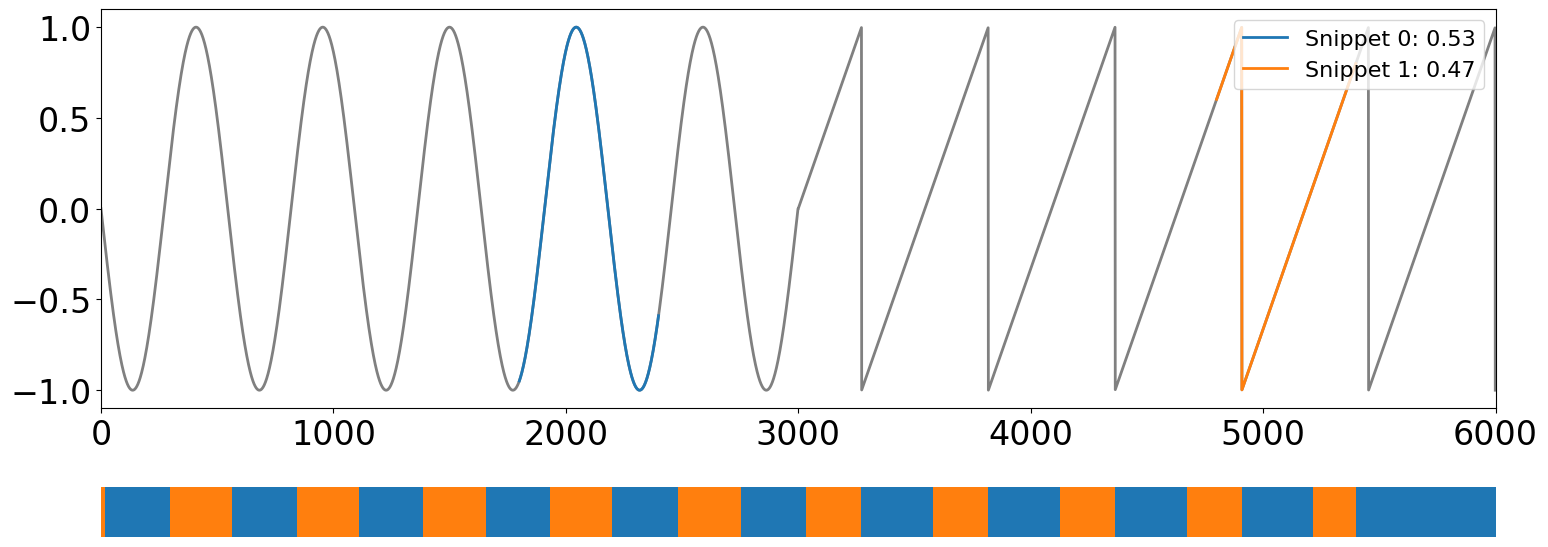

<Axes: >

In [ ]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «X» (угол крена) на временном интервале от 950 сек. до 109 сек.** из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из модуля snippets.py.

**Сниппет (snippet)** представляет собой подпоследовательность заданной длины, на которую похожи многие другие подпоследовательности данного ряда в смысле специально определяемой меры схожести. Набор сниппетов имеет существенно меньшую мощность, чем множество подпоследовательностей ряд.

**Каждый сниппет** представляет собой
один из сегментов временн´ого ряда. Со сниппетом ассоциируются его ближайшие
соседи — подпоследовательности ряда, имеющие ту же длину, что и сниппет, которые более похожи на данный сниппет,
чем на другие сегменты. Для вычисления схожести подпоследовательностей используется специализированная мера схожести, основанная на евклидовом расстоянии. Сниппеты упорядочиваются по убыванию
мощности множества своих ближайших соседей.

In [ ]:
import pandas as pd

ts_url = './datasets/PAMAP/PAMAP.txt'

df = pd.read_csv(ts_url, sep=' ', header=None).T
start_time = 1790
end_time = 1930

ts = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 11].to_numpy()


In [ ]:
snp = snippets(ts, 2000, 2, s=1000)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,505.71,2.0,NaN,35.0625,0.497271,9.08249,-1.875540,0.319610,9.10631,-1.642520,-0.064955,0.033557,0.051343,2.52139,-23.9094,3.66977,0.636708,-0.766698,0.073248,0.037565
1,505.72,2.0,NaN,35.0625,0.693164,8.93258,-1.677900,0.379878,8.90965,-1.416770,0.063998,0.052043,0.078401,2.12795,-23.8953,4.08997,0.636387,-0.766974,0.073379,0.037113
2,505.73,2.0,79.0,35.0625,0.929013,9.04638,-1.441670,0.606483,8.89380,-1.236830,0.192540,0.034474,0.070010,1.87388,-24.2730,4.23135,0.635648,-0.767586,0.073587,0.036706
3,505.74,2.0,NaN,35.0625,1.039680,9.38386,-1.595650,0.772609,8.99907,-1.237530,0.282665,0.053817,0.057465,1.73597,-23.3649,3.94322,0.635121,-0.768060,0.073553,0.035983
4,505.75,2.0,NaN,35.0625,1.070930,9.38219,-1.827400,0.938327,9.21025,-1.419260,0.335187,0.016476,0.011713,2.25530,-24.4165,4.65783,0.633378,-0.769606,0.072906,0.034988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145995,2305.66,4.0,NaN,35.6875,2.140840,7.09274,-0.213018,2.107840,7.31908,-0.041456,0.256645,-0.568124,0.005918,-12.27830,-50.9797,20.50000,0.566790,-0.673692,-0.347012,-0.323220
145996,2305.67,4.0,NaN,35.6875,2.027390,6.56647,-0.135921,2.015190,6.94196,-0.041992,0.221546,-0.501649,0.103945,-12.52640,-51.7445,20.64360,0.566736,-0.675315,-0.345593,-0.321443
145997,2305.68,4.0,NaN,35.6875,1.978930,6.11268,-0.445092,1.861420,6.39894,-0.027528,0.162119,-0.355711,0.133332,-11.76720,-51.6443,21.35340,0.566580,-0.676581,-0.344391,-0.320344
145998,2305.69,4.0,NaN,35.6875,1.677590,5.73813,-0.294450,1.707950,5.96165,-0.073210,0.122680,-0.262807,0.188172,-12.41520,-51.3625,21.34730,0.566308,-0.677672,-0.343209,-0.319786


Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

2000


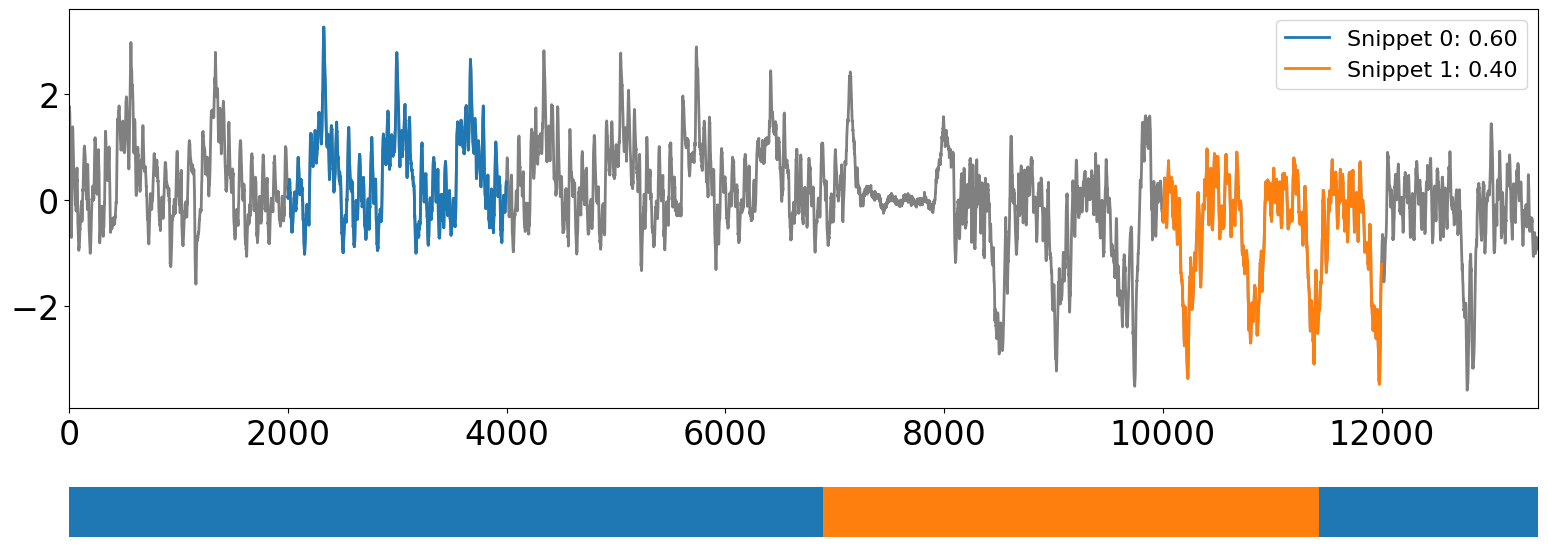

<Axes: >

In [ ]:
plot_snippets(ts, snp)

Оцените точность разметки, полученной при помощи сниппетов.

In [ ]:
labels_pred = np.zeros_like(ts)
snippets_regimes = snp[-1]
for regime in snippets_regimes:
  labels_pred[regime[1] : regime[2]] = regime[0]

In [ ]:
# получаем правильные метки
labels = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 1].to_numpy()
labels = np.where(labels == 12, 0, labels)
labels = np.where(labels == 13, 1, labels)

accuracy_score(labels, labels_pred)

0.8026658723657756

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

С помощью сниппетов можно кластеризовывать временные ряды

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1.

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,505.71,2.0,NaN,35.0625,0.497271,9.08249,-1.875540,0.319610,9.10631,-1.642520,-0.064955,0.033557,0.051343,2.52139,-23.9094,3.66977,0.636708,-0.766698,0.073248,0.037565
1,505.72,2.0,NaN,35.0625,0.693164,8.93258,-1.677900,0.379878,8.90965,-1.416770,0.063998,0.052043,0.078401,2.12795,-23.8953,4.08997,0.636387,-0.766974,0.073379,0.037113
2,505.73,2.0,79.0,35.0625,0.929013,9.04638,-1.441670,0.606483,8.89380,-1.236830,0.192540,0.034474,0.070010,1.87388,-24.2730,4.23135,0.635648,-0.767586,0.073587,0.036706
3,505.74,2.0,NaN,35.0625,1.039680,9.38386,-1.595650,0.772609,8.99907,-1.237530,0.282665,0.053817,0.057465,1.73597,-23.3649,3.94322,0.635121,-0.768060,0.073553,0.035983
4,505.75,2.0,NaN,35.0625,1.070930,9.38219,-1.827400,0.938327,9.21025,-1.419260,0.335187,0.016476,0.011713,2.25530,-24.4165,4.65783,0.633378,-0.769606,0.072906,0.034988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145995,2305.66,4.0,NaN,35.6875,2.140840,7.09274,-0.213018,2.107840,7.31908,-0.041456,0.256645,-0.568124,0.005918,-12.27830,-50.9797,20.50000,0.566790,-0.673692,-0.347012,-0.323220
145996,2305.67,4.0,NaN,35.6875,2.027390,6.56647,-0.135921,2.015190,6.94196,-0.041992,0.221546,-0.501649,0.103945,-12.52640,-51.7445,20.64360,0.566736,-0.675315,-0.345593,-0.321443
145997,2305.68,4.0,NaN,35.6875,1.978930,6.11268,-0.445092,1.861420,6.39894,-0.027528,0.162119,-0.355711,0.133332,-11.76720,-51.6443,21.35340,0.566580,-0.676581,-0.344391,-0.320344
145998,2305.69,4.0,NaN,35.6875,1.677590,5.73813,-0.294450,1.707950,5.96165,-0.073210,0.122680,-0.262807,0.188172,-12.41520,-51.3625,21.34730,0.566308,-0.677672,-0.343209,-0.319786


In [ ]:
#start_time = 840
#end_time = 870
start_time = 1790
end_time = 1930
ts2 = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 10].to_numpy()#x
ts3 = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 12].to_numpy()#z

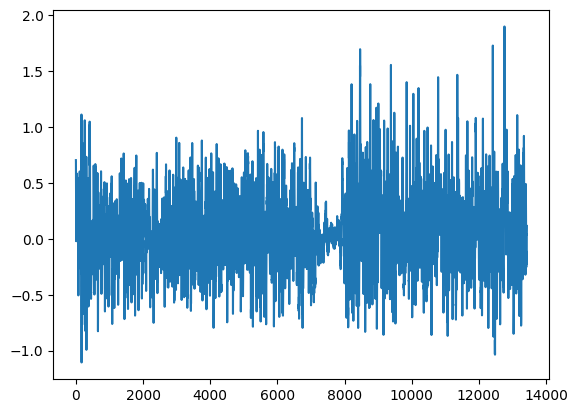

In [ ]:
plt.plot(ts2)

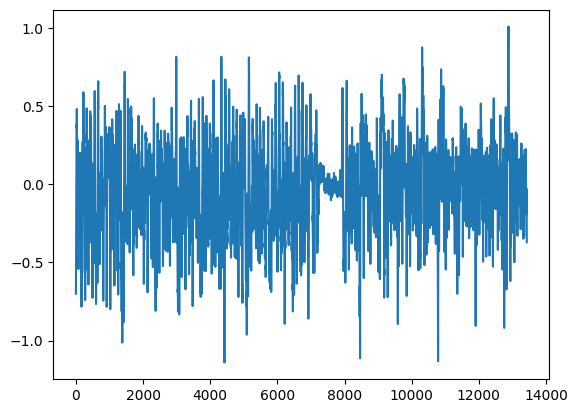

In [ ]:
plt.plot(ts3)

In [ ]:
snp2 = snippets(ts2, 2000, 2, s=1000)
snp3 = snippets(ts3, 2000, 2, s=1000)

2000


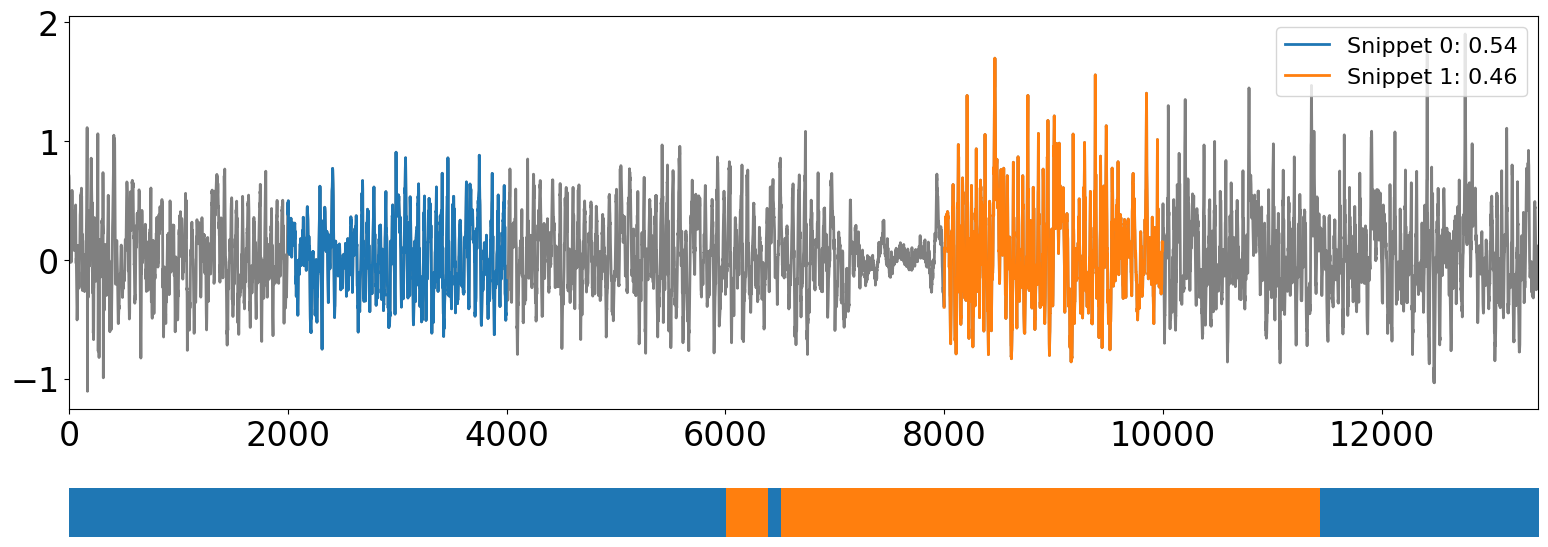

<Axes: >

In [ ]:
plot_snippets(ts2, snp2)

2000


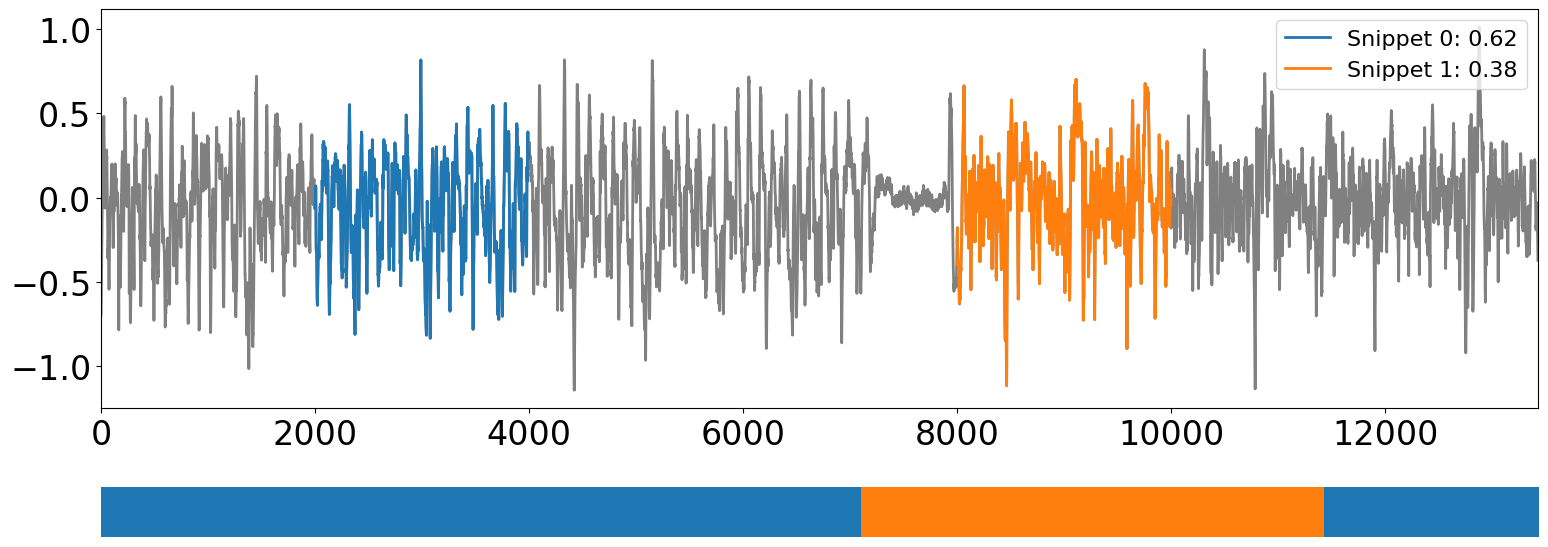

<Axes: >

In [ ]:
plot_snippets(ts3, snp3)

In [ ]:
# INSERT YOUR CODE
labels_pred2 = np.zeros_like(ts2)
snippets_regimes2 = snp2[-1]
for regime2 in snippets_regimes2:
  labels_pred2[regime2[1] : regime2[2]] = regime2[0]

In [ ]:
labels_pred2

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
labels2 = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 1].to_numpy()
labels2 = np.where(labels2 == 12, 0, labels2)
labels2 = np.where(labels2 == 13, 1, labels2)

In [ ]:
labels2

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
len(labels_pred2)

13429

In [ ]:
len(labels2)

13429

In [ ]:
accuracy_score(labels2, labels_pred2)

0.7455506739146623

In [ ]:
labels_pred3 = np.zeros_like(ts3)
snippets_regimes3 = snp3[-1]
for regime3 in snippets_regimes3:
  labels_pred3[regime3[1] : regime3[2]] = regime3[0]

In [ ]:
labels_pred3

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
len(labels_pred3)

13429

In [ ]:
labels3 = df.loc[start_time < df.iloc[:, 0]].loc[df.iloc[:, 0] < end_time].iloc[:, 1].to_numpy()
labels3 = np.where(labels3 == 12, 0, labels3)
labels3 = np.where(labels3 == 13, 1, labels3)

In [ ]:
labels3

array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
len(labels3)

13429

In [ ]:
accuracy_score(labels3, labels_pred3)

0.8180058083252663

Оцените точность разметки, полученной при помощи сниппетов.

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

При использовании трёх осей может быть получена более высокая точность классификации.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

In [ ]:
# INSERT YOUR CODE
k=9
prof_area = snippets(ts, 2000, 2, s=1000)[0]['snippet']

IndexError: ignored

In [ ]:
prof_area

(array([[-0.061646 , -0.0544887, -0.0449126, ...,  0.253972 ,  0.232309 ,
          0.266727 ],
        [-0.265329 , -0.222161 , -0.216261 , ...,  0.0227431, -0.0166991,
         -0.0467928]]),
 array([2000, 8000]),
 array([[28.27932519, 28.27932519, 28.27932519, ..., 36.74194184,
         36.74194184, 36.74194184],
        [36.91705409, 36.91705409, 36.91705409, ..., 34.75387725,
         34.7409686 , 34.70911394]]),
 array([0.62038495, 0.37961505]),
 array([296286.30598679, 219533.69003061]),
 array([[    0,     0,  7091],
        [    1,  7091, 11430]]))

In [ ]:
change = []
for i in range(1, k+1):
    change.append(prof_area[i-1] / prof_area[i] - 1)

ValueError: ignored

Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

In [ ]:
# INSERT YOUR CODE

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?